<a href="https://colab.research.google.com/github/zinebzannouti/Statistics-With-Python/blob/main/3_Matrice_de_Confusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Matrice de confusion - Pas si confuse !**
- Vous êtes-vous déjà retrouvé dans une situation où vous vous attendiez à ce que votre modèle d'apprentissage machine soit très performant, mais où il s'est avéré peu précis ?
- Vous avez fait tout le travail nécessaire - alors où le modèle de classification s'est-il trompé ? Comment pouvez-vous corriger cela ?

- Il existe de nombreuses façons (les fameuses métriques) d'évaluer les performances de votre modèle de classification, mais aucune n'a résisté à l'épreuve du temps comme la matrice de confusion.
-  Elle nous aide à évaluer les performances de notre modèle, à déterminer où il a mal fonctionné et nous offre des conseils pour corriger notre modèle ou ses hyperparamaètres.

- Dans cet article, nous allons voir comment une matrice de confusion donne une vue globale des performances d'un modèle.
- Et contrairement à son nom, vous réaliserez qu'une matrice de confusion est un concept assez simple mais puissant.
- Alors, dévoilons le mystère qui entoure la matrice de confusion !

**1.Qu'est-ce qu'une matrice de confusion ?
Oui, qu'est-ce qu'une matrice de confusion, après tout ?**

- Une matrice de confusion est une matrice N x N utilisée pour évaluer la performance d'un modèle de classification, où N est le nombre de classes cibles (les fameuses "targets").
- La matrice compare les valeurs cibles réelles avec celles prédites par le modèle d'apprentissage machine. Cela nous donne une vue d'ensemble des performances de notre modèle de classification et des types d'erreurs qu'il commet.

- Pour un problème de classification binaire, nous avons donc une matrice 2 x 2 comme indiqué ci-dessous avec 4 valeurs :
 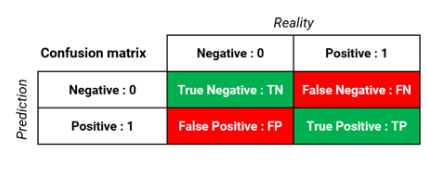
 
 
- Déchiffrons cette matrice :

- La variable cible a deux valeurs : 0 ou 1 (ou vrai/faux ou Oui/Non ou Positive/Négative...)
- Les lignes (Actual) représentent les valeurs réelles de la variable cible
- Les colonnes (Predicted) représentent les valeurs prédites de la variable cible
- Mais qu'est-ce que TP, FP, FN et TN ici ? C'est la partie cruciale d'une matrice de confusion. Comprenons chaque terme ci-dessous.

**Comprendre le vrai positif, le vrai négatif, le faux positif et le faux négatif dans une matrice de confusion**

- Vrai positif (TP comme True Positive)

La valeur prévue correspond à la valeur réelle La valeur réelle est 1 (ou positive) et le modèle prévoit une valeur de 1 (ou positive)

- Vrai négatif (TN comme True Negative)

La valeur prévue correspond à la valeur réelle La valeur réelle est 0 (ou négative) et le modèle prévoit une valeur 0 (ou négative)

- Faux positif (FP comme False Positive) - Fausse alarme

La valeur prédite est fausse La valeur réelle est 0 (ou negative), mais le modèle prédit une valeur 1 (ou positive) Également connue sous le nom d'erreur de type 1

- Faux négatif (FN comme False Negative)

- La valeur prédite est fausse La valeur réelle est 1 (ou positive), mais le modèle prédit une valeur 0 (ou négative) Également connue sous le nom d'erreur de type 2



- Avant de répondre à cette question, réfléchissons à un hypothétique problème de classification.

- Supposons que vous vouliez prédire combien de personnes sont infectées par un virus contagieux avant qu'elles ne présentent les symptômes, et les isoler de la population saine (ça vous dit quelque chose ? 😷).
- Les deux valeurs de notre variable cible seraient Malade et Non Malade.

- Maintenant, vous devez vous demander pourquoi nous avons besoin d'une matrice de confusion alors que nous avons un une métrique très répandue qui est l'exactitude. Voyons où celle-ci s'arrête.

- Notre ensemble de données est un exemple d'un ensemble de données déséquilibré. Il y a 960 points de données pour la classe négative et 40 points de données pour la classe positive.
- Voici comment nous allons calculer l'exactitude  :

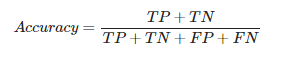

- Les valeurs totales des résultats sont :

TP = 30, TN = 930, FP = 30, FN = 10

- Ainsi, la précision de notre modèle s'avère être :

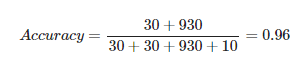
96% ! Pas mal non ?

- Mais cela donne une mauvaise idée du résultat.

- Notre modèle dit : "Je peux prédire les personnes malades 96% du temps". Mais il fait le contraire.
- Il prédit les personnes qui ne tomberont pas malades avec 96% de précision alors que les malades propagent le virus !

- Pensez-vous que ce soit une mesure correcte pour notre modèle étant donné la gravité du problème ?
- Ne devrions-nous pas mesurer le nombre de cas positifs que nous pouvons prédire correctement pour arrêter la propagation du virus contagieux ? Ou peut-être, parmi les cas correctement prédits, combien de cas positifs pour vérifier la fiabilité de notre modèle ?

- C'est là que nous rencontrons le double concept de Précision et de Rappel.

# **Précision ou rappel**
- **La précision** nous indique combien de cas correctement prévus se sont avérés positifs.

Voici comment calculer la Précision :
 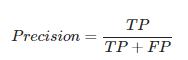

Cela permet de déterminer si notre modèle est fiable ou non.

- **Le rappel** nous indique combien de cas positifs réels nous avons pu prévoir correctement avec notre modèle.

Et voici comment nous pouvons calculer le Rappel :
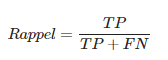

# **La F-mesure ou F-Score**
En pratique, lorsque nous essayons d'augmenter la précision de notre modèle, le rappel diminue, et vice-versa. La F-Mesure saisit les deux tendances en une seule valeur :

 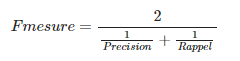
 
 
Le F-Mesure est une moyenne harmonique de la précision et du rappel, et elle donne donc une idée combinée de ces deux mesures. Elle est maximale lorsque la Précision est égale au Rappel.

# **Matrice de confusion en utilisant Scikit-Learn en Python**

In [ ]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [ ]:
# actual values
actual = [1,0,0,1,0,0,1,0,0,1]
# predicted values
predicted = [1,0,0,1,0,0,0,1,0,0]

In [ ]:
# confusion matrix
cnf_matrix = confusion_matrix(actual,predicted)

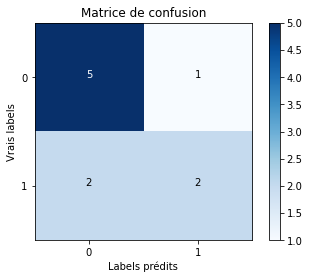

In [ ]:
classes = range(0,2)
plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

In [ ]:
# outcome values order in sklearn
tn, fp, fn ,tp = confusion_matrix(actual,predicted).reshape(-1)
print('Valeurs de TN, FP, FN, TP : \n',tn, fp, fn, tp)

Valeurs de TN, FP, FN, TP : 
 5 1 2 2


In [ ]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted)
print('Rapport de Classification  : \n',matrix)

Rapport de Classification  : 
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.67      0.50      0.57         4

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10

